# review_ML/DL

* 다음의 데이터를 이용하여 모델링 복습을 해 봅시다.
    * 데이터와 기본 라이브러리만 작성되어 있습니다.
    * 전처리와 모델링의 틀을 제공합니다.
    * 여러분이 가장 자신 있는 알고리즘을 이용하여 모델링하시오.
        * 가능하다면 튜닝도 시도하시오.
    * 성능 평가를 합니다.

## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()
# 신용 대출을 받으려고 대출 신청을 한 사람들
# 전체자금 대출 
# 향후신용도 >> 나중에 돈을 잘 갚을 사람 1 은행으로부터 리스크가 일어날 수 있는 사람들 0 
# 계좌가 없는 사람 계좌가 있는데 잔고가 없는 사람, 계좌가 있고 돈이 조금 있는 사람 >> 은행 데이터가 숫자인데 왜 범주로 만들어졌을까? 생각해봐야함

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Duration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


* Target : Creditability
* 숫자형변수 : Duration, CreditAmount, Age
* 범주형변수 : 나머지

## 2.데이터 준비


### 1) x, y로 나누기 

In [3]:
target = 'Creditability'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### 2) 가변수화

In [4]:
# cols_num에 포함되지 않는 애들만 뽑아내서 리스트로 내라(모든 범주형의 값이 0,1로 이루어지게)
cols_num = ['Duration', 'CreditAmount', 'Age']
cols_cat = [x for x in list(x) if x not in cols_num]
# cols_cat = ['Employment', 'CurrentAddress', 'CreditCount', 'Dependents', 'Telephone', 'AccountBalance', 'Payment', 'Purpose', 'SexMarital', 'MostValuableAsset', 'Apartment','Occupation','ForeignWorker'] 

In [5]:
x.head()
# 데이터의 타입이 1, 2, 3으로 숫자인데 이게 의미를 가지죠? 그럼 가변수화 ㄱ
# 숫자의 의미가 되려면 계좌가 없는 사람과 계좌가 있는 사람을 더하면 갑자기 계좌가 생기진 않잖아요
# 1은 1이고 2는 2고 3은 3인 거지 다 개별적인 것 그래서 이걸 가변수화해준 것
# 타입이 숫자인 거지 의미가 숫자인 건 아니다

,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


In [6]:
x = pd.get_dummies(x, columns = cols_cat, drop_first=True)
x.head()

,Duration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Purpose_1,Purpose_2,...,Apartment_3,CreditCount_2,CreditCount_3,CreditCount_4,Occupation_2,Occupation_3,Occupation_4,Dependents_2,Telephone_2,ForeignWorker_2
0,24,1249,28,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,9,276,22,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,18,1049,21,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,24,6419,44,0,0,0,0,1,1,0,...,1,1,0,0,0,0,1,1,1,0
4,12,1424,55,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### 3) train : validation 분할

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state=20)

### 4) 스케일링

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.fit_transform(x_val)

## 3.모델링
* 최소 3가지의 알고리즘을 이용하여 모델링을 수행하시오.
* 튜닝을 시도하시오.
* validation 셋으로 예측결과를 저장하시오.

In [9]:
# 사용될 라이브러리, 함수 로딩

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score




### 1) 모델1

In [10]:
# 모델 선언
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()
dt_model = DecisionTreeClassifier(random_state=2021)
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
svc_model = SVC()

In [12]:
# 모델 학습
xgb_model.fit(x_train, y_train)
lgbm_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
knn_model.fit(x_train_s, y_train)
lr_model.fit(x_train, y_train)
svc_model.fit(x_train_s, y_train)

c:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [14]:
# 성능 예측
xgb_cv_score = cross_val_score(xgb_model, x_train, y_train, cv=10)
lgbm_cv_score = cross_val_score(lgbm_model, x_train, y_train, cv=10)
dt_cv_score = cross_val_score(dt_model, x_train, y_train, cv=10)
rf_cv_score = cross_val_score(rf_model, x_train, y_train, cv=10)
knn_cv_score = cross_val_score(knn_model, x_train, y_train, cv=10)
lr_cv_score = cross_val_score(lr_model, x_train, y_train, cv=10)
svc_cv_score = cross_val_score(svc_model, x_train, y_train, cv=10)

c:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [15]:
# 결과 확인
print('XGB :', xgb_cv_score.mean())
print('lgbm :', lgbm_cv_score.mean())
print('dt :', dt_cv_score.mean())
print('rf :', rf_cv_score.mean())
print('knn :', knn_cv_score.mean())
print('lr :', lr_cv_score.mean())
print('svc :', svc_cv_score.mean())


XGB : 0.73875
lgbm : 0.7275
dt : 0.6812499999999999
rf : 0.7475
knn : 0.6587500000000001
lr : 0.7375
svc : 0.72


### 2) 모델2

- KNN

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# 3~99 2씩 증가시켜라
params = {'n_neighbors': range(3, 100, 2), 'metric':['manhattan', 'euclidean']}

model_knn = GridSearchCV(KNeighborsClassifier(), params, cv = 5)
model_knn.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(3, 100, 2)})

In [18]:
model_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 15}

In [19]:
result_knn = pd.DataFrame(model_knn.cv_results_)
result_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002955,0.001547,0.128998,0.101634,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.68750,0.68750,0.65625,0.75000,0.71250,0.69875,0.031225,97
1,0.004388,0.002327,0.095345,0.014612,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.73750,0.72500,0.68125,0.73750,0.69375,0.71500,0.023251,47
2,0.003192,0.001465,0.129453,0.047352,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.76250,0.69375,0.68750,0.73750,0.68125,0.71250,0.031869,92
3,0.002194,0.001163,0.085387,0.015744,manhattan,9,"{'metric': 'manhattan', 'n_neighbors': 9}",0.72500,0.70625,0.71875,0.71875,0.71875,0.71750,0.006124,20
4,0.002594,0.001741,0.065823,0.007646,manhattan,11,"{'metric': 'manhattan', 'n_neighbors': 11}",0.75625,0.70625,0.71250,0.72500,0.71875,0.72375,0.017410,6


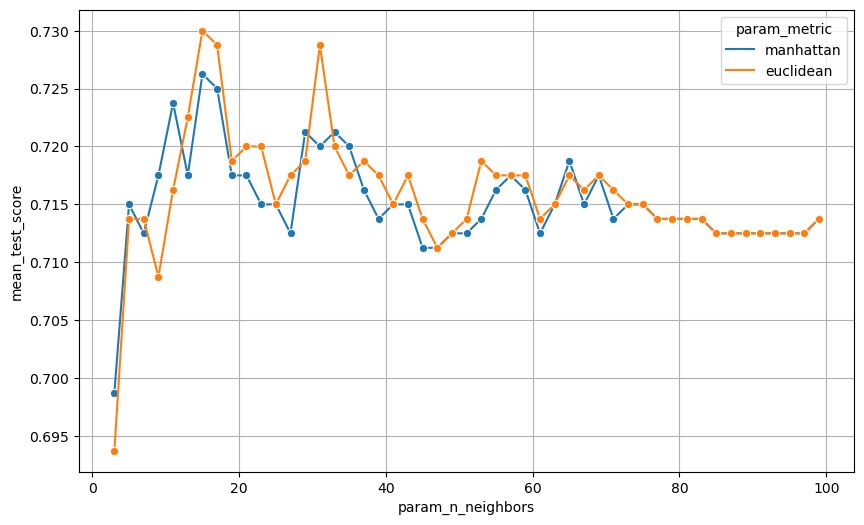

In [21]:
# 튜닝 결과를 그래플 그려보셨나요? 중요!
result_knn = pd.DataFrame(model_knn.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x = 'param_n_neighbors', y='mean_test_score', data = result_knn,
             marker = 'o', hue = 'param_metric')
plt.grid()
plt.show()
# hue = 매트릭별로 쪼개가지구 그려라
# K값은 모델이 작을수록 복잡해진다.

# 그래프로 뭘 얻냐? 1. 추세를 보세요 추세를

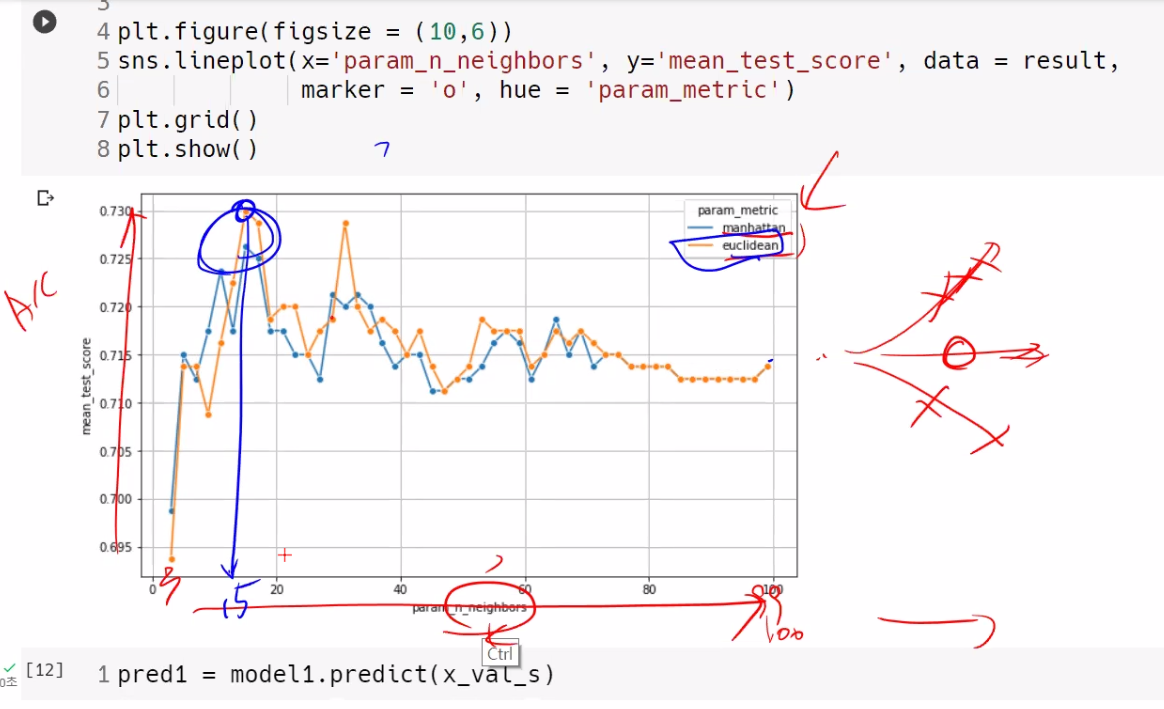

### 3) 모델3

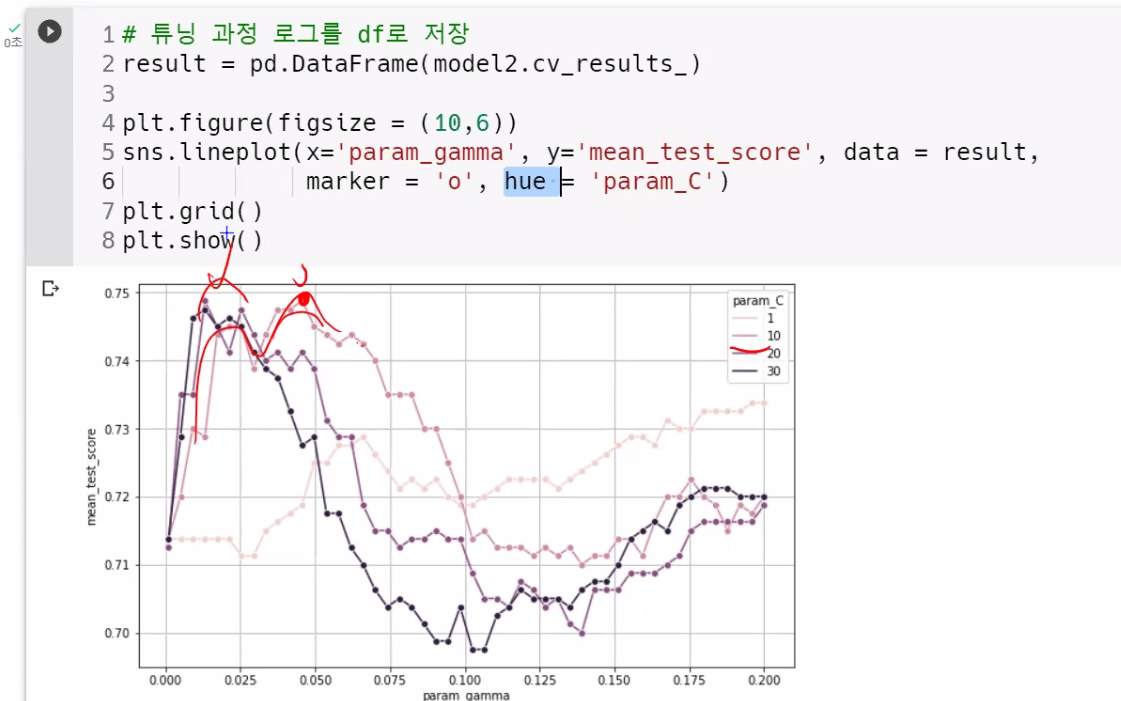

### 4) 모델4

### 5) 모델5

## 4.모델 성능 비교
* 모델 중 성능이 가장 좋은 모델은?